In [1]:
import pandas as pd
import numpy as np
from datetime import date, time,datetime
from dateutil import parser
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\nirdo'

In [12]:
space_missions = pd.read_csv('C:\\Users\\nirdo\\Desktop\\space_missions.csv', encoding='latin-1')

In [13]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [14]:
space_missions.shape

(4630, 9)

In [15]:
space_missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [16]:
space_missions.Date = pd.to_datetime(space_missions.Date)

In [17]:
space_missions.Time = pd.to_timedelta(space_missions.Time)

In [18]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Company        4630 non-null   object         
 1   Location       4630 non-null   object         
 2   Date           4630 non-null   datetime64[ns] 
 3   Time           4503 non-null   timedelta64[ns]
 4   Rocket         4630 non-null   object         
 5   Mission        4630 non-null   object         
 6   RocketStatus   4630 non-null   object         
 7   Price          1265 non-null   object         
 8   MissionStatus  4630 non-null   object         
dtypes: datetime64[ns](1), object(7), timedelta64[ns](1)
memory usage: 325.7+ KB


In [19]:
space_missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,0 days 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,0 days 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,0 days 16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,0 days 03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,0 days 07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [10]:
space_missions.Price = space_missions.Price.replace('[^0-9]', '', regex=True).astype(float)

In [11]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Company        4630 non-null   object         
 1   Location       4630 non-null   object         
 2   Date           4630 non-null   datetime64[ns] 
 3   Time           4503 non-null   timedelta64[ns]
 4   Rocket         4630 non-null   object         
 5   Mission        4630 non-null   object         
 6   RocketStatus   4630 non-null   object         
 7   Price          1265 non-null   float64        
 8   MissionStatus  4630 non-null   object         
dtypes: datetime64[ns](1), float64(1), object(6), timedelta64[ns](1)
memory usage: 325.7+ KB


In [12]:
space_missions['MissionStatus'].value_counts()

Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: MissionStatus, dtype: int64

In [13]:
space_missions['MissionStatus'].is_monotonic

C:\Users\nirdo\AppData\Local\Temp\ipykernel_11232\1185228105.py:1: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  space_missions['MissionStatus'].is_monotonic


False

In [14]:
#How have rocket launches trended across time? Has mission success rate increased?
#yes launch success rate has been increased over time

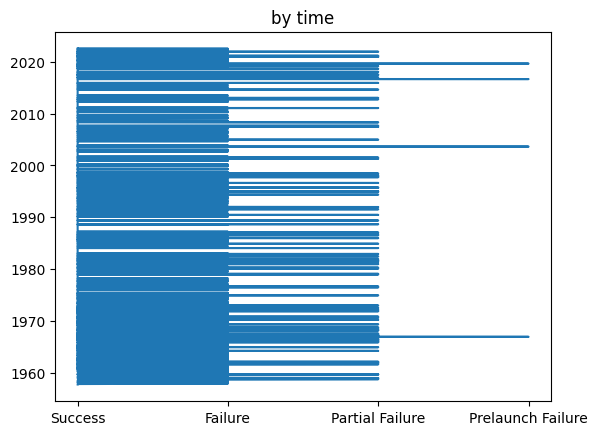

In [15]:
fig, ax = plt.subplots()
ax.plot(space_missions.MissionStatus,space_missions.Date)
ax.set_title ('by time');

In [16]:
space_missions.RocketStatus.value_counts()

Retired    3620
Active     1010
Name: RocketStatus, dtype: int64

In [17]:
#Which countries have had the most successful space missions? Has it always been that way?

In [18]:
space_missions['Location']

0             Site 1/5, Baikonur Cosmodrome, Kazakhstan
1             Site 1/5, Baikonur Cosmodrome, Kazakhstan
2              LC-18A, Cape Canaveral AFS, Florida, USA
3              LC-26A, Cape Canaveral AFS, Florida, USA
4              LC-18A, Cape Canaveral AFS, Florida, USA
                             ...                       
4625            SLC-4E, Vandenberg SFB, California, USA
4626    LC-101, Wenchang Satellite Launch Center, China
4627         LC-39A, Kennedy Space Center, Florida, USA
4628             Jiuquan Satellite Launch Center, China
4629       LC-3, Xichang Satellite Launch Center, China
Name: Location, Length: 4630, dtype: object

In [19]:
countries = space_missions.loc[:,['Location', 'MissionStatus']]

In [20]:
countries.head()

,Location,MissionStatus
0,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Success
1,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Success
2,"LC-18A, Cape Canaveral AFS, Florida, USA",Failure
3,"LC-26A, Cape Canaveral AFS, Florida, USA",Success
4,"LC-18A, Cape Canaveral AFS, Florida, USA",Failure


In [21]:
countries.Location = countries['Location'].str.split(', ').str.get(2)

In [22]:
countries.set_index('Location', inplace=True)

In [23]:
countries.head()

,MissionStatus
Location,
Kazakhstan,Success
Kazakhstan,Success
Florida,Failure
Florida,Success
Florida,Failure


In [24]:
countries[countries['MissionStatus'] == 'Success'].index.value_counts()

Russia              1318
Florida              825
Kazakhstan           625
California           407
China                326
French Guiana        296
Japan                115
India                 68
Pacific Ocean         33
Virginia              30
New Zealand           25
Texas                 23
Israel                 9
Kenya                  9
Marshall Islands       6
Iran                   6
Australia              3
Alaska                 3
Algeria                3
Gran Canaria           2
Barents Sea            2
North Korea            2
South Korea            2
New Mexico             2
Kodiak                 2
Name: Location, dtype: int64

In [25]:
countries[countries['MissionStatus'] == 'Failure'].index.value_counts()

Kazakhstan                        72
Florida                           65
Russia                            63
California                        57
China                             22
French Guiana                     14
India                              9
Iran                               9
Japan                              5
Virginia                           5
Australia                          3
South Korea                        3
Kodiak                             3
North Korea                        3
Pacific Ocean                      3
New Zealand                        3
Marshall Islands                   3
Israel                             2
Maranhão                           2
Pacific Missile Range Facility     1
Barents Sea                        1
New Mexico                         1
Texas                              1
Name: Location, dtype: int64

In [26]:
##Russia has the most successfull missions till aug 2022
#no Russia had failures in the past ,  counts to total of 63 failure missions

In [27]:
#Which rocket has been used for the most space missions? Is it still active?

In [28]:
space_missions.loc[:,['Rocket', 'Mission']]

,Rocket,Mission
0,Sputnik 8K71PS,Sputnik-1
1,Sputnik 8K71PS,Sputnik-2
2,Vanguard,Vanguard TV3
3,Juno I,Explorer 1
4,Vanguard,Vanguard TV3BU
...,...,...
4625,Falcon 9 Block 5,Starlink Group 3-2
4626,Long March 5B,Wentian
4627,Falcon 9 Block 5,Starlink Group 4-25
4628,Zhongke-1A,Demo Flight


In [29]:
space_missions['Mission'].value_counts().nlargest(3)

DSP            8
Demo Flight    8
KH-11          6
Name: Mission, dtype: int64

In [30]:
space_missions[space_missions['Mission'].isin(['DSP','Demo Flight'])].loc[:,]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
2441,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1989-06-14,0 days 13:18:00,Titan IV(402)A,DSP,Retired,NaN,Success
2534,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1990-11-13,0 days 00:37:00,Titan IV(402)A,DSP,Retired,NaN,Success
2790,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA",1994-12-22,0 days 22:19:00,Titan IV(402)A,DSP,Retired,NaN,Success
2922,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA",1997-02-23,0 days 20:20:00,Titan IV(402)B,DSP,Retired,NaN,Success
3062,Lockheed,"SLC-41, Cape Canaveral AFS, Florida, USA",1999-04-09,0 days 17:01:00,Titan IV(402)B,DSP,Retired,NaN,Failure
3126,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA",2000-05-08,0 days 16:01:00,Titan IV(402)B,DSP,Retired,NaN,Success
3190,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA",2001-08-06,0 days 07:28:00,Titan IV(402)B,DSP,Retired,NaN,Success
3313,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA",2004-02-14,0 days 18:50:00,Titan IV(402)B,DSP,Retired,NaN,Success
3344,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2004-11-08,0 days 18:29:00,Soyuz 2.1a,Demo Flight,Active,1742.0,Success
3772,VKS RF,"Site 35/1, Plesetsk Cosmodrome, Russia",2014-07-09,0 days 12:00:00,Angara 1.2,Demo Flight,Active,NaN,Success


In [31]:
#Demo Flight mission are for testing purpose i think cuz every 8 demo fllight missions has different rockets and they all 
#are active. so we go with DSp mission


In [32]:
space_missions[space_missions['Mission']=='DSP'].loc[:,['Rocket','Mission', 'RocketStatus']]

,Rocket,Mission,RocketStatus
2441,Titan IV(402)A,DSP,Retired
2534,Titan IV(402)A,DSP,Retired
2790,Titan IV(402)A,DSP,Retired
2922,Titan IV(402)B,DSP,Retired
3062,Titan IV(402)B,DSP,Retired
3126,Titan IV(402)B,DSP,Retired
3190,Titan IV(402)B,DSP,Retired
3313,Titan IV(402)B,DSP,Retired


In [33]:
#the rocket used in more space mission is Titan IV(402)B
# and its retired

In [114]:
#which company has the most success & failure mission status 

In [49]:
space_missions.Company.value_counts()

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
OneSpace               1
Douglas                1
GK LS                  1
Firefly                1
CAS Space              1
Name: Company, Length: 62, dtype: int64

In [54]:
space_missions[space_missions['MissionStatus']=='Success']['Company'].value_counts().nlargest(3)

RVSN USSR      1614
CASC            318
Arianespace     282
Name: Company, dtype: int64

In [55]:
space_missions[space_missions['MissionStatus']=='Failure']['Company'].value_counts().nlargest(3)

RVSN USSR           121
General Dynamics     37
US Air Force         30
Name: Company, dtype: int64

In [102]:
#most expensive rocket?and the company made them?

In [57]:
space_missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,0 days 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,0 days 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,0 days 16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,0 days 03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,0 days 07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [62]:
space_missions.Price.isnull().sum()

3365

In [66]:
space_missions.Price.mean()

2687.313043478261

In [84]:
space_missions.select_dtypes(include=float).median()

Price    109.0
dtype: float64

In [87]:
space_missions.fillna({
                'Price':space_missions.Price.mean()                      
}, inplace=True)

In [101]:
space_missions[['Company','Rocket','Price']].sort_values(by=['Price'], ascending=False).head(3)

,Company,Rocket,Price
2323,RVSN USSR,Energiya/Polyus,500000.0
2407,RVSN USSR,Energiya/Buran,500000.0
778,NASA,Saturn V,116000.0


In [100]:
space_missions[['Company','Rocket','Price']].nlargest(columns='Price', n=3)

,Company,Rocket,Price
2323,RVSN USSR,Energiya/Polyus,500000.0
2407,RVSN USSR,Energiya/Buran,500000.0
607,NASA,Saturn V,116000.0


In [96]:
space_missions.iloc[[2323,2407],]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
2323,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15,0 days 17:30:00,Energiya/Polyus,Polyus Space Station,Retired,500000.0,Success
2407,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15,0 days 03:00:00,Energiya/Buran,Buran,Retired,500000.0,Success


In [97]:
#most expensive rockets made was Energiya/Polyus & Energiya/Buran
#And both of them are made by RVSN USSR

In [104]:
space_missions.Company.unique()

array(['RVSN USSR', 'US Navy', 'AMBA', 'US Air Force', 'NASA',
       'General Dynamics', 'Martin Marietta', "Armée de l'Air", 'UT',
       'ASI', 'OKB-586', 'CECLES', 'Yuzhmash', 'CASC', 'CNES',
       'Roscosmos', 'ISAS', 'RAE', 'MHI', 'ISRO', 'ESA', 'Arianespace',
       'IAI', 'Boeing', 'Douglas', 'Northrop', 'Lockheed', 'VKS RF',
       'MITT', 'ILS', 'EER', 'AEB', 'SRC', 'KCST', 'Sea Launch',
       'Kosmotras', 'Eurockot', 'CASIC', 'Starsem', 'SpaceX', 'ULA',
       'Land Launch', 'ISA', 'KARI', 'JAXA', 'Khrunichev', 'Blue Origin',
       'Sandia', 'ExPace', 'Rocket Lab', 'Exos', 'Landspace', 'OneSpace',
       'i-Space', 'IRGC', 'Virgin Orbit', 'Astra', 'Galactic Energy',
       'Virgin Galactic', 'GK LS', 'Firefly', 'CAS Space'], dtype=object)

In [113]:
space_missions[space_missions['Company']=='RVSN USSR']['Location'].sample(5)

788       Site 133/3, Plesetsk Cosmodrome, Russia
0       Site 1/5, Baikonur Cosmodrome, Kazakhstan
2076             Site 107/1, Kapustin Yar, Russia
2004    Site 1/5, Baikonur Cosmodrome, Kazakhstan
555     Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, dtype: object